<a href="https://colab.research.google.com/github/seungtaemoon/Portfolio/blob/master/The%20Analysis%20of%20Income%20Discrepancy%20In%20Terms%20of%20Marriage%20Status%20and%20Sex(Korean)/%EA%B3%A0%EC%86%8C%EB%93%9D%EC%9E%90%EA%B0%80_%EB%90%98%EB%A0%A4%EB%A9%B4_%EA%B2%B0%ED%98%BC%ED%95%9C_%EB%82%A8%EC%84%B1%EC%9D%B4%EC%96%B4%EC%95%BC_%ED%95%9C%EB%8B%A4%3F_%EB%AC%B8%EC%8A%B9%ED%83%9C_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고소득자가 되려면 결혼한 남성이어야 한다?

---



In [1]:
# 분석 및 모델링을 위한 플러그인 준비
%%capture
import sys

if 'google.colab' in sys.modules:
  !pip install category_encoders
  !pip install pandas-profiling==2.*
  !pip install eli5
  !pip install pdpbox
  !pip install shap

## 초록
성평등을 이루려는 많은 여성들과 남성들의 노력에도 불구하고, 아직 전세계적으로 남녀의 임금격차가 상당한 편이다. 우리나라와 일부 국가들에서는, 그 중에서도 결혼한 이들의 성별 소득 격차가 상당히 심한 편이다. 결혼을 하면 경력 단절을 우려해야하는 현실에서, 여성이 결혼을 하지 않으려는 현상은 어찌보면 자연스럽다. 과연, 다른 나라에서도 이러한 현상이 일어날까? 결혼 여부에 따라 성별간의 소득격차가 달라질 확률은 어느정도일까? 결혼 여부, 성별, 교육, 직업, 연령 등의 데이터를 이용하여, 모델링을 통해 어떤 사람들이 5만달러 이상의 소득을 올릴 수 있는지를 머신러닝모델을 통해 분류예측해보았다. 

## 목차
###1. 배경과 목적


###2. 데이터 준비
> 2-1. 데이터 설명

> 2-2. 특성 만들기

> 2-3. 전반적인 분석(EDA)

###3. 모델링

> 3-1. 기준모델 찾기

> 3-2. 데이터 누수 확인

> 3-3. 분류모델을 통한 예측

>> 3-3-1. 선진국과 개발도상국의 결혼 여부에 따른 소득 격차

>> 3-3-2. 인종별 결혼 여부에 대한 소득 격차

>> 3-3-3. 연령별 결혼 여부에 대한 소득 격차

>> 3-3-4. 성별간 결혼 여부에 대한 소득 격차

###4. 결론



## 1. 배경

통계청의 [2019년 혼인 및 이혼 통계](https://www.gov.kr/portal/ntnadmNews/2120432) 조사에 따르면 국내 혼인건수는 24만건 정도로 작년보다 약 7% 감소하였다. 결혼을 안하는 시대가 왔다고 해도 과언이 아니다.  

우리가 걸었던 길을 먼저 가본 선진국들도 같은 문제를 겪고있다. 사회가 발전하면서, 경제적으로 풍요로워지지만, 그만큼 한정된 자원을 가지고 경쟁해야하는 상황이 심화되는 것이다. 자연스럽게 자신의 생존이 어려워, 가정을 꾸린다는 책임을 지는 것에 대해 상당한 부담을 느끼게 되는 것이다. 

문제는, 결혼한 이들 중에서도, 남성과 여성의 임금격차가 존재한다는 사실이다. 스위스 다보스에서 열리는 세계경제포럼에서 발표한 "2018 세계 성차별 보고서"에 따르면, 여성은 남성 임금의 63%라고 한다. 이 격차가 해소되기 위해서는 202년을 더 기다려야 한다고 한다. [(참조: 전세계 남녀임금격차 63%, 100%까지 202년 걸려)](http://www.skyedaily.com/news/news_view.html?ID=80081#:~:text=%EC%84%B8%EA%B3%84%EA%B2%BD%EC%A0%9C%ED%8F%AC%EB%9F%BC%EC%9D%80%2017,%EB%8D%94%20%EA%B8%B0%EB%8B%A4%EB%A0%A4%EC%95%BC%20%ED%95%9C%EB%8B%A4%EA%B3%A0%20%EB%B0%9C%ED%91%9C%ED%96%88%EB%8B%A4.) 이 수치는 성별당 혼인 관계에 관계없이 계산된 것이다.

한국에서도 출산휴가가 정착이 되고 있지만, 여전히 사용하기 어려운 환경에 놓인 사람들이 많다. 임신한 여성들을 짐으로 여기거나, 퇴사를 종용하는 회사들도 많다. 커리어를 유지하면서 육아를 하기에는 너무도 힘든 환경에 놓인 사람들이 많은 것이다. 결혼이 자신의 경력단절로 이어질 수 있다는 인식이 생기면서 저출산을 부추겼다. 결혼한 여자들은, 경제적인 수입을 출산하는 순간부터 남편에게 의지할 수 밖에 없는 것이다. 자연스럽게, 결혼 이후 경제적 자립을 할 수 없을 것이라는 생각은, 여성들이 결혼을 기피하는 가장 큰 원인이 되었다. 남성 역시, 결혼을 하게 되면 지출이 많아지는데, 이를 감당할 수 있을 만큼의 더 큰 소득을 올리는 것이 매우 어렵다는 어느 정도 공통된 의식을 가지고 있다. 하지만, 전반적으로 여성들이 우려하는 것 만큼이나 결혼을 했을 때 경력과 경제력을 포기해야할지도 모른다는 우려는 하지 않는다.    

그렇다면, 전세계에서 결혼 여부에 따라 더 높은 소득을 올릴 수 있는 확률이 달라질까? 우리가 선진국으로 분류하는 나라들과 개발도상국으로 분류하는 나라들에서의 기혼자와 미혼자 사이의 소득격차는 어느 정도일까? 인종 별로 혼인 여부에 따른 소득 격차는 어느 정도일까? 또한, 연령별로 혼인 여부에 따른 격차는 어느 정도인가? 마지막으로, 결혼 여부에 따라 남성과 여성이 고소득을 올릴 확률은 서로 얼마나 차이가 날까? Kaggle에서 추출한 Adult Income Dataset을 통해 이 질문들에 답해보고자 한다. [(링크: adult income dataset)](https://www.kaggle.com/wenruliu/adult-income-dataset)

EDA(Exploratory Data Analysis)와 모델링을 통해 특정 소득을 기준으로 두고 그 이상과 이하의 그룹으로 나누어, 교육, 연령, 직업, 인종, 성별, 국가 등의 특성들이 이 기준을 충족하는데 있어 어떠한 영향을 주는지 알아볼 것이다. 일부 국가의 세율에 따라, 또는 개별 가구들의 재정석 상황에따라, 5만달러 이상을 고소득자로 분류하는 것은 상대적으로 어려울 수 있다. 그러나, 타깃데이터가 있는 지도학습에서는 절대적인 기준을 세워 분류를 할 필요가 있다. 그러므로, 전세계적인 범위에서 5만달러(약 5천700만원)정도 이상은 고소득자로 생각할 수 있다고 판단하여, 이를 기준으로 저소득자와 고소득자를 분류해 보기로 하였다.


## 2. 데이터 준비

### 2-1. 데이터 설명

이번 분석에 사용된 데이터는 Kaggle의 Adult Income Dataset이다. 여기서 다룰 데이터는 총 12개의 칼럼으로 이루어져 있다.

1) 숫자형 데이터:

* `age`: 설문 참여자들의 연령

* `educational-num`: 설문 참여자들의 교육 이수 연도

* `hours-per-week`: 설문 참여자들의 주당 근로 시간

2) 범주형 데이터:

* `workclass`: 설문 참여자들이 공무원인지 사기업 근로자인지에 대한 분류

* `education`: 설문 참여자들의 교육 수준에 대한 분류

* `marital status`: 설문 참여자들의 결혼 여부

* `occupation`: 설문 참여자들의 직업

* `relationship`: 설문 참여자들의 배우자 및 자녀 유무 여부

* `race`: 설문 참여자들의 인종 여부

* `gender`: 설문 참여자들의 성별 여부

* `native-country`: 설문 참여자들의 국가

* `income_>50K`: 설문 참여자들의 소득 수준 (0: 5만달러 이하, 1: 5만달러 이상)

3) 타깃데이터

타깃데이터는 `income_>50K`로써, 각 개인이 5만달러 이상의 소득을 올리는지 판단한다. 0값은 5만달러 이하 즉, 저소득자로 분류되고, 1은 5만달러 이상 즉, 고소득자로 분류된다. 









In [2]:
from google.colab import files
file = files.upload()

Saving income.csv to income.csv


In [3]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv("income.csv")
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income_>50K
0,67,Private,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,60,United-States,1
1,17,Private,12th,8,Never-married,Other-service,Own-child,White,Male,15,United-States,0
2,31,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
3,58,State-gov,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,40,United-States,0
4,25,State-gov,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,1
43953,19,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,40,United-States,0
43954,30,Private,Some-college,10,Divorced,Sales,Not-in-family,White,Male,58,United-States,0
43955,46,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,35,United-States,0


### 2-2. 특성 만들기



도메인 지식을 바탕으로, 새로운 특성들을 생성해보았다. 정리해보자면 아래와 같다.



1. 숫자형 데이터:
* `extra_hour`: 정확한 초과시간 계산


2. 범주형 데이터:
* `more_than_52_hours`: 근로시간 52시간 초과 여부
* `Full_time_status`: Full-Time Job 여부
* `post-secondary`: 대학 교육 이수 여부 
* `occupation_group`: 사무직(white-collar job)과 현장직(blue-collar job) 구분
* `own_child`: 아이가 있는지를 나타내는 특성
* `white`: 백인/비백인을 나타내는 특성 
* `marrried_gender_status`: 결혼여부와 성별을 동시에 나타내는 특
* `race_gender`: 인종과 성별 특성
* `Developed World`: 선진국과 개발도상국을 분리하는 특성
* `country_race_gender`: 국가, 인종, 성별을 모두 나타내는 특성


3. 수정된 데이터:
* `marital-status` 특성 수정(Married, Single, Relationship Lost)
* `workclass` 특성 수정(Private, Public, Not Working)

1) 근로시간 52시간 초과 여부 `more_than_52_hours`

한국 기준으로 52시간을 초과하면, 초과근무 수당을 지급하여야한다. 그렇다면, 52시간을 초과하지 않는 이들보다 평균 소득이 더 높지 않을까? 과연 다른 나라에서도 초과근무시간이 많을수록, 더 소득이 높은지를 알아보기위해, 52시간 이상 근로하는 이들을 구분하기 위한 `more_than_52_hours`라는 특성를 만들어보았다. 어디까지나 52시간이라는 기준은 한국기준이지만, 다른 나라에서는 이러한 기준으로 평가를 했을 때, 소득 수준이 얼마나 차이나는지를 보고싶었다. `hours-per-week`를 기준으로 52시간을 초과할 경우 "Yes", 그렇지 않은 경우를 "No"라고 정의했다.


In [4]:
# 1. 근로시간 52시간 초과자 (more_than_52_hours) 특성 생성

hours_52 = []

for i in df["hours-per-week"]:
  if i >= 52:
    hours_52.append("Yes")
  else:
    hours_52.append("No")

df["more_than_52_hours"] = hours_52

df["more_than_52_hours"].value_counts()

No     39092
Yes     4865
Name: more_than_52_hours, dtype: int64

2) 정확한 초과시간 계산하기 `extra_hour`

그렇다면, 전세계적으로 주당 40시간이 상식적인 정상 근무시간인데, 각 개인이 40시간을 기준으로 얼마나 초과 근무를 하는지에 대해 숫자형 특성을 새로 만들어 볼 수 있을 것이라는 생각이 들었다. 주당 평균 근무시간을 나타내는 `hours-per-week` 특성에서 40을 빼는 방법으로 계산할 수 있다. -값들은, 주당 평균 근무시간이 40시간 미만이라고 볼 수 있다. 


In [5]:
# extra_hour 특성 만들기
df["extra_hour"] = df["hours-per-week"]-40
df["extra_hour"].value_counts()

 0     20513
 10     3810
 5      2438
 20     1969
-5      1756
       ...  
 41        2
 48        2
 39        1
 42        1
 47        1
Name: extra_hour, Length: 94, dtype: int64

3) Full-Time Job 여부 `Full_time_status` 

다시 `hours-per-week` 특성으로 기준으로, 30시간 미만으로 일하는 이들에 대해서는 "Part-Time", 30시간 이상 일하는 이들에 대해서는 "Full Time"으로 구분하는 특성을 만들어 볼 수 있을 것 같다. 또한 일하는 시간이 "0"인 이들은 "Not Working"으로 구분할 수 있다. (특성 생성 결과, 근무시간이 0인 이들은 없는 것을 알 수 있다.) 


In [6]:
# Full_time_status 특성 만들기

time_status = []

for i in df["hours-per-week"]:
  if i < 30:
    time_status.append("Part-time")
  if i == 0:
    time_status.append("Not working")
  else:
    time_status.append("Full-time")

time_status = pd.Series(time_status)

df["Full_time_status"] = time_status
df["Full_time_status"].value_counts()

Full-time    39047
Part-time     4910
Name: Full_time_status, dtype: int64

4) `marital-status` 특성 수정

또한, `marital-status`라는 특성이 생각보다 매우 다양한 듯 보인다. "Married-civ-spouse"나 married-af-spouse 둘다 결혼을 했다는 의미인데, 이렇게까지 구분을 하는 것은 불필요하다는 생각이 들었다. 그래서, 결혼을 한 이들은 모두 "married"로 정의하고, 그렇지 않은 이들은 "single", 이혼, 사별, 과부등을 겪은 이들은 "relationship lost"로 처리하는 것이 가장 좋을 것 같다는 생각이 들었다. 따라서 marital_status라는 특성을 수정해보겠다.

In [7]:
# 2. Marital_Status 고치기

df["marital-status"].value_counts()

Married-civ-spouse       20147
Never-married            14513
Divorced                  5971
Widowed                   1364
Separated                 1361
Married-spouse-absent      570
Married-AF-spouse           31
Name: marital-status, dtype: int64

In [8]:
df["marital-status"] = df["marital-status"].replace({
    "Married-civ-spouse": "Married", 
    "Married-spouse-absent": "Married", 
    "Married-AF-spouse": "Married",
    "Divorced": "Relationship lost",
    "Widowed": "Relationship lost",
    "Separated": "Relationship lost",
    "Never-married": "Single"
                          })

df["marital-status"].value_counts()

Married              20748
Single               14513
Relationship lost     8696
Name: marital-status, dtype: int64

5) `workclass`의 특성 수정하기


다음으로 workclass의 특성을 한번 보자.

In [9]:
df["workclass"].value_counts()

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64

굳이 local-gov, state-gov등등을 나눌 필요가 없다는 생각이 든다. 이들을 다 "Public"으로 묶고, 나머지의 근무형태는 "Private"으로 묶고, 수입이 없는 이들이나 일을하지 않는 이들은 "Not Working"으로 구분하는 것이 나을 것 같다는 생각이 든다.

In [10]:
# workclass를 "public", "private", "not working"으로 구분하기

df["workclass"] = df["workclass"].replace({
    "Self-emp-not-inc": "Private",
    "Local-gov": "Public",
    "State-gov": "Public",
    "Self-emp-inc": "Private",
    "Federal-gov": "Public",
    "Without-pay": "Not-Working",
    "Never-worked": "Not-Working"
                          })

df["workclass"].value_counts()

Private        35569
Public          5862
Not-Working       28
Name: workclass, dtype: int64

6) `post-secondary` 특성 만들기

또한 대학교육을 받은자와, 그렇지않은 자들을 구분하기 위해 `post-secondary`라는 특성을 생성하는 것은 어떨까? 이를 위해 `education`특성만을 보기보다는, 교육을 이수받은 년수를 나타내는 `education-num`과 같이 보면 어떨까? 

In [11]:
df.groupby("education")["educational-num"].agg(["max", "min", "mean"])

,max,min,mean
education,,,
10th,6,6,6
11th,7,7,7
12th,8,8,8
1st-4th,2,2,2
5th-6th,3,3,3
7th-8th,4,4,4
9th,5,5,5
Assoc-acdm,12,12,12
Assoc-voc,11,11,11


위의 최소값, 최대값, 평균값이 모두 같은 것으로 보아, `educational-num`의 특정 연도를 기준으로 대학 학위를 땄는지 그렇지 않은지를 판단할 수 있을 것 같다. 좀 더 범위를 줄인 새로운 데이터를 생성해보도록 하겠다. 학사 대학 교육을 받은 이들은 "Bachelor or higher", 그렇지 않은 이들은 "Lower than Bachelor"로 구분한다.

In [12]:
# post_secondary 특성 생성 

post_secondary = []

for i in df["educational-num"]:
  if i >= 13:
    post_secondary.append("Bachelor or higher")
  else:
    post_secondary.append("Lower than Bachelor")

df["post_secondary"] = post_secondary

df["post_secondary"].value_counts()

Lower than Bachelor    33062
Bachelor or higher     10895
Name: post_secondary, dtype: int64

7) `occupation_group` 특성 만들기

다음으로 직업을 나타내는 `occupation` 특성으로부터, "white-collar job"(사무직), "blue-collar job"(기술직)으로 구분할 수 있는 `occupation_group` 이라는 특성을 만들어보겠다.

In [13]:
# occupation_group 생성

df["occupation"].value_counts()

Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: occupation, dtype: int64

In [14]:
# Dictionary로 맵핑하기

df["occupation_group"] = df["occupation"].replace({
    "Craft-repair": "Blue-collar job",
    "Prof-specialty": "White-collar job",
    "Exec-managerial": "White-collar job",
    "Adm-clerical": "White-collar job",
    "Sales": "Blue-collar job",
    "Other-service": "Blue-collar job",
    "Machine-op-inspct": "Blue-collar job",
    "Transport-moving": "Blue-collar job",
    "Handlers-cleaners": "Blue-collar job",
    "Farming-fishing": "Blue-collar job",
    "Tech-support": "White-collar job",
    "Protective-serv": "Blue-collar job",
    "Priv-house-serv": "Blue-collar job",
    "Armed-Forces": "Blue-collar job"
                          })

df["occupation_group"].value_counts()

Blue-collar job     24102
White-collar job    17349
Name: occupation_group, dtype: int64

8) `own_child` 특성 만들기 

가족 관계를 나타내는  `relationship`이라는 특성이 있는데, 이 특성도 좀 더 단순화될 수 있지 않을까라는 생각이 들었다. 하지만, 이 특성은  `marital-status`와 관련이 깊다는 생각이 들어, 두 특성을 같이 보아야할 것 같다는 생각이 들었다. 

In [15]:
df.groupby("marital-status")["relationship"].value_counts()

marital-status     relationship  
Married            Husband           17749
                   Wife               2091
                   Not-in-family       317
                   Other-relative      234
                   Own-child           188
                   Unmarried           169
Relationship lost  Not-in-family      4604
                   Unmarried          3241
                   Own-child           559
                   Other-relative      292
Single             Not-in-family      6400
                   Own-child          6089
                   Unmarried          1192
                   Other-relative      832
Name: relationship, dtype: int64

각 특성을 확인해보니, 결혼한 이들은 당연히 husband/wife 관계가 있지만, 이를 제외하고 모든 다른 결혼여부 정보에서는 모든 범주의 관계가 있었다. 그렇다는것은, 결혼을 한 이들을 제외하면, 특성에 크게 구애받지 않고 관계정보를 분류할 수 있을 것 같다는 의미가 된다. 

일단 결혼을 했는지에 대한 정보는 marital-status 가 말해주기 때문에, 굳이 결혼 관계를 나타내는 정보가 필요할 것 같지는 않다. 흥미로운 것은, 모든 결혼여부범주에 대해 아이가 있는 사람들이 존재한다는 것인데, 아무래도 과부나 사별, 이혼을 포함한 것일 것이다.

그렇다면, 반드시 결혼한 이들만 아이가 있는 것은 아니라는 것을 확인했으므로, 아이가 있는지를 나타내는 특성을 하나 만들 수 있지 않을까? 

In [16]:
# 아이가 있는지를 나타내는 own_child 특성만들기

own_child = []

for i in df["relationship"]:
  if i == "Own-child":
    own_child.append("Yes")
  else:
    own_child.append("No")

df["own_child"] = own_child

df["own_child"].value_counts()

No     37121
Yes     6836
Name: own_child, dtype: int64

9) `white` 특성 만들기

다음으로, 인종을 나타내는 `race` 특성에 주목하자. 알다시피, 미국이나 유럽등의 국가들이 대부분 소득수준이 높고, 그 중에서도 백인들이 평균적으로 소득수준이 높다는 추정은 많이 들어왔다. 그렇다면, 인종역시 백인(white)과 비백인(non-white)들로 구분하여 데이터 분석에 활용할 수 있을거라는 생각이 들었다.



In [17]:
# 백인/비백인을 구분하는 white 특성 만들기
white = []

for i in df["race"]:
  if i == "White":
    white.append("White")
  else:
    white.append("Non-White")

df["white"] = white

df["white"].value_counts()

White        37572
Non-White     6385
Name: white, dtype: int64

10) `marrried_gender_status` 특성 생성하기

다음으로, 성별을 나타내는 `gender` 정보가 있는데, 이 중에서도 결혼을 하거나 싱글인 남성이나 여성이 있을 것이다. `marital-status`와 관련지어,  결혼한 남성과 싱글인 남성, 그리고 결혼한 여성과 싱글인 여성을 구분해 보겠다. 오직 "Married"인 남성/여성만 "Married Male"이나 "Married Female"로 처리하며, 나머지 범주의 남녀는 "Single Male", "Single Female"로 처리한다.

In [18]:
# 결혼한 남성/여성, 싱글 남성/여성만을 보여주는 married_gender_status 특성 생성

married_single = []

for i, j in zip(df["marital-status"], df["gender"]):
  if i == "Married" and j == "Male":
    married_single.append(i + " " + j)
  elif i == "Married" and j == "Female":
    married_single.append(i + " " + j)
  elif j == "Female" or j == "Male":
    married_single.append("Single" + " " + j)

married_single = pd.Series(married_single)
married_single.value_counts()

Married Male      18221
Single Female     12030
Single Male       11179
Married Female     2527
dtype: int64

실제 데이터와 비교해보자.

In [19]:
pd.crosstab(df["marital-status"], df["gender"])

gender,Female,Male
marital-status,,
Married,2527,18221
Relationship lost,5533,3163
Single,6497,8016


원래 데이터에 `married_gender_status`라는 칼럼을 추가한다.

In [20]:
df["married_gender_status"] = married_single
df["married_gender_status"].value_counts()

Married Male      18221
Single Female     12030
Single Male       11179
Married Female     2527
Name: married_gender_status, dtype: int64

11) `race_gender` 특성 만들기

다음으로, 각 인종에 대해 성별 정보를 결합시켜, 정확히 백인 남성/여성, 또는 아시아인 남성/여성 인지등을 구분할 수 있는 특성을 만들어보고 싶었다.

In [21]:
# race_gender 특성 생성
race_gender = []

for i, j in zip(df["race"], df["gender"]):
  race_gender.append(i + " " + j)

race_gender = pd.Series(race_gender)
race_gender.value_counts()

White Male                   25868
White Female                 11704
Black Male                    2136
Black Female                  2082
Asian-Pac-Islander Male        908
Asian-Pac-Islander Female      465
Amer-Indian-Eskimo Male        257
Other Male                     231
Amer-Indian-Eskimo Female      164
Other Female                   142
dtype: int64

In [22]:
# 본래 데이터에 더하기
df["race_gender"] = race_gender

12) `Developed World` 특성 만들기

다음으로, `native-country`데이터의 정보를 보자.

In [23]:
df["native-country"].value_counts()

United-States                 39429
Mexico                          880
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
England                         109
South                           105
Jamaica                          97
Dominican-Republic               97
Italy                            94
Japan                            83
Guatemala                        79
Vietnam                          77
Columbia                         75
Poland                           72
Haiti                            71
Portugal                         59
Taiwan                           58
Iran                             52
Nicaragua                        46
Greece                           44
Ecuador                          42
Peru                        

아무래도, 미국/유럽 및 동아시아 등에 포진한 국가들의 경제 수준이 높기 때문에, 소득에 있어서 이 국가들과 다른 개발도상국 사이에 평균 급여의 차이가 분명히 존재할 것이라는 생각이 들었다. 그러므로, 선진국과 개발 도상국들을 분류할 수 있는 특성을 만들어 보겠다. 개발도상국의 기준은 2019년 GDP Per Capita가 1만 달러 이하인 국가들로써, 인테넷에서 일일이 찾아서 지정하였다. `Developed_World`라는 특성을 만들었고, "Yes"는 선진국, "No"는 개발도상국을 의미한다.

In [24]:
 df["Developed_World"] = df["native-country"].replace({
    "United-States": "Yes",
    "Mexico": "No",
    "Philippines": "No",
    "Germany": "Yes",
    "Puerto-Rico": "Yes",
    "Canada": "Yes",
    "El-Salvador": "No",
    "India": "No",
    "Cuba": "No",
    "China": "No",
    "England": "Yes",
    "South": "No",
    "Dominican-Republic": "No",
    "Jamaica": "No",
    "Italy": "Yes",
    "Japan": "Yes",
    "Guatemala": "No",
    "Vietnam": "No",
    "Columbia": "No",
    "Poland": "Yes",
    "Haiti": "No",
    "Portugal": "Yes",
    "Taiwan": "Yes",
    "Iran": "No",
    "Nicaragua": "No",
    "Greece": "Yes",
    "Ecuador": "No",
    "Peru": "No",
    "France": "Yes",
    "Ireland": "Yes",
    "Hong": "Yes",
    "Thailand": "No",
    "Cambodia": "No",
    "Trinadad&Tobago": "No",
    "Honduras": "No",
    "Laos": "No",
    "Outlying-US(Guam-USVI-etc)": "Yes",
    "Yugoslavia": "Yes",
    "Scotland": "Yes",
    "Hungary": "Yes",
    "Holand-Netherlands": "Yes"
                          })

df["Developed_World"].value_counts()

Yes    40630
No      2564
Name: Developed_World, dtype: int64

선진국의 비율이 훨씬 높은 데이터라는 것을 알 수 있다. 

위 데이터를 다루다 보니, 조금 고쳐야 할 데이터들을 찾게 되었다.

In [25]:
# native-country 데이터의 오타 수정

df["native-country"].replace({"South": "South Africa", "Hong": "Hong Kong"}, inplace=True)
df["native-country"].value_counts()

United-States                 39429
Mexico                          880
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
England                         109
South Africa                    105
Dominican-Republic               97
Jamaica                          97
Italy                            94
Japan                            83
Guatemala                        79
Vietnam                          77
Columbia                         75
Poland                           72
Haiti                            71
Portugal                         59
Taiwan                           58
Iran                             52
Nicaragua                        46
Greece                           44
Ecuador                          42
Peru                        

13) `country_race_gender` 특성 만들기

마지막으로, 인종 구성이 다양한 국가들이 있는데, 각 인종들마다 또 그 안에서 성별에 따라 소득 수준이 다를 수 있다는 생각이 들었다. 국가 정보와 인종, 성별 정보를 모두 합한 칼럼을 만들어보자.

In [26]:
# country_race_gender 만들기

df["country_race_gender"] = df["native-country"] + " " + df["race"] + " " + df["gender"]
df["country_race_gender"].value_counts()

United-States White Male               23801
United-States White Female             10811
United-States Black Female              1928
United-States Black Male                1916
Mexico White Male                        622
                                       ...  
Nicaragua Black Female                     1
South Africa Other Male                    1
Germany Asian-Pac-Islander Male            1
Nicaragua Asian-Pac-Islander Female        1
Columbia Amer-Indian-Eskimo Female         1
Name: country_race_gender, Length: 200, dtype: int64

데이터를 좀 확인해 보니 캄보디아의 흑인 남성이나, 도미니카 공화국에 아시아인 남성이 있다는 것이 잘 믿기지 않았다. 이 데이터가 신빙성 있는지 확인할 필요가 있을 것 같다.

In [27]:
# 데이터 신빙성 확인하기
country_group = df.groupby("native-country")["race_gender"].value_counts()
country_group

native-country  race_gender              
Cambodia        Asian-Pac-Islander Male      17
                Asian-Pac-Islander Female     3
                White Male                    2
                Black Female                  1
                Black Male                    1
                                             ..
Vietnam         Asian-Pac-Islander Female    27
                White Female                  1
                White Male                    1
Yugoslavia      White Male                   14
                White Female                  5
Name: race_gender, Length: 200, dtype: int64

캄보디아 뿐만 아니라 베트남에도 비아시아인들이 존재한다, 이 것도 같이 확인해 보자.

In [28]:
# 캄보디아, 도미니카 공화국, 베트남에 거주하는 인종들 보기
print("Cambodia:{}".format(country_group.loc["Cambodia"]), "\n", "Dominican Republic:{}".format(country_group.loc["Dominican-Republic"]), "\n", "Vietnam:{}".format(country_group.loc["Vietnam"]))

Cambodia:race_gender
Asian-Pac-Islander Male      17
Asian-Pac-Islander Female     3
White Male                    2
Black Female                  1
Black Male                    1
Name: race_gender, dtype: int64 
 Dominican Republic:race_gender
White Male                 31
White Female               28
Other Male                 13
Black Female                9
Black Male                  8
Other Female                7
Asian-Pac-Islander Male     1
Name: race_gender, dtype: int64 
 Vietnam:race_gender
Asian-Pac-Islander Male      48
Asian-Pac-Islander Female    27
White Female                  1
White Male                    1
Name: race_gender, dtype: int64


정말로 캄보디아에 거주하는 흑인의 데이터가 있으며, 베트남에서도 백인 남녀가 있다는 것이 확인되었다. 도미니카 공화국도 마찬가지로 아시아인 남성이 있다. 도미니카 공화국이 이민자들로 이루어진 나라이기 때문에, 어느정도 수긍할 수 있을 것 같다. 베트남에서 일하는 백인 남녀의 경우, 본국에서 파견을 간 가족에 의해 그곳에서 태어나고 자랐을 가능성이 있었을 것이다. 언젠가 베트남이 프랑스의 식민지였었다는 이야기를 들었는데, 그것과도 관련이 있을 수 있다. 캄보디아도 마찬가지로 정치적이나 개인적인 이유로 그곳에서 태어난 흑인이나 백인이 있을 수 있다. 자세히는 알 수 없지만, 어쨌든 새로 생성한 특성이 신빙성이 있다는 것은 확인했다. 

###2-3. 전반적인 EDA

이제 EDA를 위해 전체 데이터를 보자.

In [29]:
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income_>50K,more_than_52_hours,extra_hour,Full_time_status,post_secondary,occupation_group,own_child,white,married_gender_status,race_gender,Developed_World,country_race_gender
0,67,Private,Doctorate,16,Relationship lost,Exec-managerial,Not-in-family,White,Male,60,United-States,1,Yes,20,Full-time,Bachelor or higher,White-collar job,No,White,Single Male,White Male,Yes,United-States White Male
1,17,Private,12th,8,Single,Other-service,Own-child,White,Male,15,United-States,0,No,-25,Part-time,Lower than Bachelor,Blue-collar job,Yes,White,Single Male,White Male,Yes,United-States White Male
2,31,Private,Bachelors,13,Married,Exec-managerial,Husband,White,Male,40,United-States,1,No,0,Full-time,Bachelor or higher,White-collar job,No,White,Married Male,White Male,Yes,United-States White Male
3,58,Public,7th-8th,4,Married,Transport-moving,Husband,White,Male,40,United-States,0,No,0,Full-time,Lower than Bachelor,Blue-collar job,No,White,Married Male,White Male,Yes,United-States White Male
4,25,Public,Some-college,10,Single,Other-service,Not-in-family,Black,Male,40,United-States,0,No,0,Full-time,Lower than Bachelor,Blue-collar job,No,Non-White,Single Male,Black Male,Yes,United-States Black Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,Bachelors,13,Married,Exec-managerial,Husband,White,Male,50,United-States,1,No,10,Full-time,Bachelor or higher,White-collar job,No,White,Married Male,White Male,Yes,United-States White Male
43953,19,Private,HS-grad,9,Single,Other-service,Own-child,White,Female,40,United-States,0,No,0,Full-time,Lower than Bachelor,Blue-collar job,Yes,White,Single Female,White Female,Yes,United-States White Female
43954,30,Private,Some-college,10,Relationship lost,Sales,Not-in-family,White,Male,58,United-States,0,Yes,18,Full-time,Lower than Bachelor,Blue-collar job,No,White,Single Male,White Male,Yes,United-States White Male
43955,46,Private,Bachelors,13,Single,Sales,Not-in-family,White,Female,35,United-States,0,No,-5,Full-time,Bachelor or higher,Blue-collar job,No,White,Single Female,White Female,Yes,United-States White Female


1) 데이터 분포 및 이상치 확인

다음으로 boxplot을 그려 숫자형데이터들의 분포를 보자.

In [30]:
# 숫자형 데이터들의 boxplot 그리기

from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px

for i in df.columns:
  if np.dtype(df[i]) != object:
    fig = px.box(df, y=i)
    fig.show()

In [31]:
# 데이터의 전반적인 description 보기
df.describe()

,age,educational-num,hours-per-week,income_>50K,extra_hour
count,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,10.074118,40.407694,0.239279,0.407694
std,13.734401,2.575092,12.400303,0.426648,12.400303
min,17.000000,1.000000,1.000000,0.000000,-39.000000
25%,28.000000,9.000000,40.000000,0.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000,0.000000
75%,48.000000,12.000000,45.000000,0.000000,5.000000
max,90.000000,16.000000,99.000000,1.000000,59.000000


위 boxplot은 숫자형 데이터에 대해 분포를 보여준 것이다. 먼저 나이(sge)에 대해서 80~90대의 연령이 이상치로 표현된 것을 볼 수 있는데, 사실 이 나이대에 일을 하는 사람들도 분명 있을 수 있기 때문에 마냥 이들을 제거할 수는 없다고 판단되었다. 다음으로 교육이수연도(educational-num) 특성에서는 2년 미만의 교육기간이 이상치로 보여지지만, 역시 정식교육을 받지 않는 이들, 특히 개발도상국에서 이러한 사람들이 분명히 있을 수 있다. 이들 역시 국가간 교육 격차를 보여주는 중요한 데이터이기 때문에, 마냥 제거하기는 어렵다. 또한 hours-per-week의 경우, 33-52시간을 정상 분포로 보았다. 하지만, 얼마전 우리나라에서도 문제가된 과다업무로 인한 과로사의 문제가 분명 다른나라에도 있을 것을 생각한다면, 주당 100시간 가까이 일하는 이들도 분명히 있을 수 있다. (누군지는 몰라도 참 비인간적인 삶을 사는 것 같아 안타깝다.) 타깃 변수인 income_>50K 변수는 0과 1로만 이루어진 특성이므로, 이상치가 없다. 마지막으로, 40시간 기준 초과 근무시간을 나타내는 extra_hour의 경우, hours-per-week와 같은 이유로 이상치를 마냥 제거할 수 없다. 이후의 분석에서 개발도상국들과 선진국들의 실태를 비교할 것이므로, 이상치가 있더라도 제거하지 않기로 판단했다.

2) 데이터 결측치 확인

데이터의 결측치를 확인해보자.

In [32]:
# 데이터 결측치 확인
df.isnull().sum()

age                         0
workclass                2498
education                   0
educational-num             0
marital-status              0
occupation               2506
relationship                0
race                        0
gender                      0
hours-per-week              0
native-country            763
income_>50K                 0
more_than_52_hours          0
extra_hour                  0
Full_time_status            0
post_secondary              0
occupation_group         2506
own_child                   0
white                       0
married_gender_status       0
race_gender                 0
Developed_World           763
country_race_gender       763
dtype: int64

나중에 모델링을 하게되면, 이러한 결측치들을 imputation으로 채울 수는 있을 것이다. 하지만, 그렇게 되면 데이터의 분석에 왜곡이 발생할 가능성이 있다. 데이터의 특성상, 범주형 데이터가 대부분이기 때문에, 가장 많이 나온 값을 imputation해 줄 수 밖에 없다. 범주형 데이터의 평균이나 중간값을 계산할 수는 없기 때문이다. 예를 들어 위 workclass에서 가장 자주 나온 값이 public이라고하자. 그렇게 되면, 사기업에서 일하는 근로자라도 결측치가 있다면 public으로 분류되는 오류를 범할 수 있다. 때문에 이렇게 범주형 데이터가 대부분인 상황에서는 결측치는 될 수 있는한 모두 제거하는 것이 옳다고 판단된다. 

In [33]:
# 결측치 제거
df.dropna(inplace=True)
df.isnull().sum()

age                      0
workclass                0
education                0
educational-num          0
marital-status           0
occupation               0
relationship             0
race                     0
gender                   0
hours-per-week           0
native-country           0
income_>50K              0
more_than_52_hours       0
extra_hour               0
Full_time_status         0
post_secondary           0
occupation_group         0
own_child                0
white                    0
married_gender_status    0
race_gender              0
Developed_World          0
country_race_gender      0
dtype: int64

결측치를 제거한 이후의 데이터의 크기를 다시보자.

In [34]:
# 결측치를 제거한 이후의 데이터 다시보기
df.shape

(40727, 23)

다행히도, 결측치를 제거한 이후에 데이터가 큰 손실이 난 것 같지는 않다.

## 3. 모델링

###3-1. 기준모델 확인

다음으로 심층 데이터분석을 위한 베이스라인을 보자. 예측하려는 타깃의 클래스가 먼저 어느 정도의 비율인지 알아보자.

0    0.752204
1    0.247796
Name: income_>50K, dtype: float64


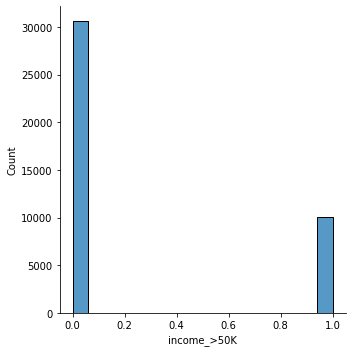

In [35]:
# 타깃의 분포확인

target = df["income_>50K"]

import seaborn as sns

sns.displot(target)

print(target.value_counts(normalize=True))

0(5만달러이하)의 비율이 1(5만달러이상)의 비율보다 약 3배 더 많다. 하지만, 극단적으로 클래스가 불균형하지는 않다고 판단된다.

다음으로 기준모델을 만들기 위해 타깃을 분리한 훈련데이터와 검증데이터로 나누어 보자.

In [36]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.2, random_state=2)

train.shape, val.shape

((32581, 23), (8146, 23))

In [37]:
# 데이터 세부적으로 나누기

target = "income_>50K"

features = df.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((32581, 22), (32581,), (8146, 22), (8146,))

In [38]:
# 기준모델 만들어보기
# 최다 클래스의 빈도가 정확도가 됩니다.
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()[0]

y_pred = [majority_class] * len(y_train)

accuracy_score(y_train, y_pred)

0.7524937847211565

In [39]:
# 검증세트에서 정확도 검증하기
y_pred = [majority_class] * len(y_val)
accuracy_score(y_val, y_pred)

0.7510434569113675

기준모델은 0.75정도의 성능을 보였다. 그렇다면, 모델링에서는 적어도 이 정확도 보다는 좋게 나와야 할 것이다. 

###3-2. 데이터 누수 확인

데이터의 누수가 있을 수 있다는 가능성은 언제 모델링을 하더라도 배제할 수 없을 것이다. 이를 위해서 먼저 모델을 만들어보고, 각 클래스의 구분에 대해 어느 정도의 성능이 나오는지를 볼 필요가 있다. 

이번에는 본격적인 모델을 만들어 보겠다. 범주형 데이터가 대부분이기 때문에, 인코딩이 필요하다. 인코딩과 모델링을 동시에 할 수 있는 category_encoders 라이브러리의 make_pipeline이라는 기능을 활용한다. 모델링에는 비용함수를 최적화 할 수 있는 Gradient Boost Classifier를 사용하면 에러를 최소화 할 수 있을 것으로 판단했다. 인코딩방법은 각 데이터가 특정한 정수로 표현되어야하기 때문에 Ordinal Encoder를 사용한다. 

In [40]:
# 모델링하기

from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(), 
    XGBClassifier(random_state=2)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



검증 정확도:  0.8280137490793027


검증 정확도가 이전 기준모델에 비해 약 5% 향상 된 것을 볼 수 있다. 혹시라도 데이터 누수가 있어 과적합의 문제가 있지 않을까? Confusion Matrix와 Classification Matrix를 통해 데이터의 편중을 확인해 보았다. 마지막으로 ROC Curve를 그려 AUC를 계산해보았다.

Text(0.5, 1.0, 'Confusion matrix, n = 8146')

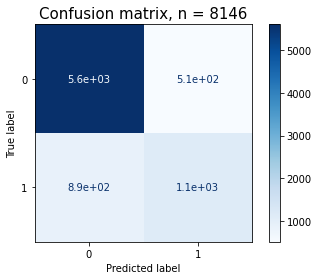

In [41]:
# Confusion Matrix 그리기
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

TP와 TN의 비율이 엄청나게 차이가 난다고 생각되지는 않아 지나친 Class imblance는 아니므로 F1 성능은 1의 성능이 0에 비해 엄청 떨어질 것이라는 생각이 들지는 않는다. 확인을 위해 Classification Matrix를 생성해 보았다.

In [42]:
# Classification Matrix

from sklearn.metrics import classification_report
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6118
           1       0.69      0.56      0.62      2028

    accuracy                           0.83      8146
   macro avg       0.78      0.74      0.75      8146
weighted avg       0.82      0.83      0.82      8146



타깃값 0에 대해서는 재현율이 정밀도 보다 높앗으나, 1에 대해서는 그 반대였다. 0과 1사이의 갭이 어느 정도 있는데, 클래스가 어느 정도 불균형한 문제이기 때문에 감수할 필요가 있다고 판단된다. ROC Curve를 그리면 좀 더 확실하게 알 수 있을 것이다.

AUC score:  0.8803825956065878


Text(0, 0.5, 'TPR')

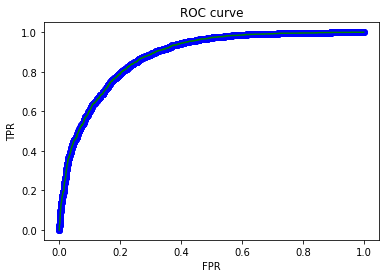

In [43]:
# ROC Curve 그리기 및 AUC 계산

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = pipe.predict_proba(X_val)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

다행히도, 꽤 분명한 언덕형 그래프가 나왔다. 데이터 자체는 누수가 크게 없는 것으로 판단된다.

###3-3. 분류모델을 통한 예측

1) Gradient Boost Classifier를 사용한 모델링

본 모델링을 위해, Gradient Boost Classifier를 사용해보았다. 인코딩 방식은 이전의 Ordinal Encoder를 사용했다.

In [44]:
# Gradient Boost Classifier로 모델만들기

from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train);

모델링 이후에, 검증 데이터를 통해 모델의 성능을 체크해보자.

In [45]:
# 모델의 성능 검증 결과 보기
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.8267861527129879
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      6413
           1       0.58      0.68      0.62      1733

    accuracy                           0.83      8146
   macro avg       0.74      0.77      0.76      8146
weighted avg       0.84      0.83      0.83      8146



이전의 Random Forest의 결과와는 반대로, 1에 대한 재현율이 정밀도 보다 더 높게 나왔다. 또한 F1이 1에 대해서는 약 4% 정도 향상되었다. 0과 1에 대한 F1의 차이가 조금 줄어들었고, 모델의 정확도는 올라갔다.

2) 최적의 하이퍼파라미터 찾기

다음으로, 모델에 대한 최적의 파라미터를 찾아보자, RandomizedSearchCV를 통해, 가장 최적의 파라미터 값을 찾아본다. 

먼저, 최대한 모든 데이터를 검증해야 하므로, 데이터를 모두 하나로 합쳐보겠다.

In [46]:
# 테스트와 검증 데이터 합치기

X_total = pd.concat([X_train, X_val])
y_total = pd.concat([y_train, y_val])

X_total.shape, y_total.shape

((40727, 22), (40727,))

다음으로 튜닝할 하이퍼파라미터의 범위를 지정하여 튜닝한다. 일반적으로 Gradient Boost에서 가장 중요한 파라미터들은 n_estimators, max_depth, learning_rate 등으로 판단되어, 이들을 튜닝하도록 한다. 

In [47]:
# Randomized Search CV 
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

pipe = make_pipeline(
    OrdinalEncoder()
    ,XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
dists = {
    'xgbclassifier__n_estimators': range(0, 1000, 100),
    'xgbclassifier__max_depth': range(0, 30, 1),
    'xgbclassifier__learning_rate': np.linspace(0, 1, num=10)
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=10, 
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_total, y_total);



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.0min finished


최적화된 파라미터들을 보자.

In [48]:
print(clf.best_estimator_)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['workclass', 'education',
                                      'marital-status', 'occupation',
                                      'relationship', 'race', 'gender',
                                      'native-country', 'more_than_52_hours',
                                      'Full_time_status', 'post_secondary',
                                      'occupation_group', 'own_child', 'white',
                                      'married_gender_status', 'race_gender',
                                      'Developed_World',
                                      'country_race_gender'],
                                drop_i...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=1.0,
                               max_delta_step=0,

In [49]:
print(clf.best_params_)

{'xgbclassifier__n_estimators': 500, 'xgbclassifier__max_depth': 5, 'xgbclassifier__learning_rate': 1.0}


최적화된 파라미터를 바탕으로 최적화된 모델을 찾는다.

In [50]:
# 최적화된 모델 찾기
pipe = clf.best_estimator_
model = pipe.named_steps["xgbclassifier"]
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

3) 최적의 특성들을 선택하기

다음으로, 최적의 특성들이 무엇인지를 파악할 필요가 있다. 이를 위해서 ELI5 라이브러리를 활용할 수 있다. 이번에는 TargetEncoder를 통해 타깃에 대한 사후 확률을 기반으로한 인코딩으로 조금 더 정확한 모델을 사용해보자.

In [51]:
# Permutation Importances 

# ELI5 이용하기

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder 

pipe = Pipeline([
    ('preprocessing', make_pipeline(TargetEncoder())),
    ('xgb', model) 
])



In [52]:
# pipeline 생성을 확인하기
pipe.named_steps

{'preprocessing': Pipeline(memory=None,
          steps=[('targetencoder',
                  TargetEncoder(cols=None, drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                min_samples_leaf=1, return_df=True,
                                smoothing=1.0, verbose=0))],
          verbose=False),
 'xgb': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=1.0, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
               nthread=None, objective='binary:logistic', random_state=2,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1)}

학습데이터를 통해 학습하고, 검증 데이터를 이용하여, 정확도를 보자.

In [53]:
# 검증 데이터에서 정확도 보기
pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



검증 정확도:  0.8072673704885833


In [54]:
# ELI5를 통해 특성 중요도 파악

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['xgb'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 스코어 계산
permuter.fit(X_val_transformed, y_val);

특성 중요도를 확인해보자

In [55]:
# 특성중요도 확인하기
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

relationship             0.042131
education                0.036067
occupation               0.025706
age                      0.025190
hours-per-week           0.012521
country_race_gender      0.012472
marital-status           0.009747
workclass                0.004640
race_gender              0.003904
educational-num          0.002750
married_gender_status    0.002676
gender                   0.002652
native-country           0.002627
white                    0.001031
race                     0.000982
occupation_group         0.000344
post_secondary           0.000000
extra_hour               0.000000
more_than_52_hours       0.000000
own_child                0.000000
Developed_World         -0.000098
Full_time_status        -0.001277
dtype: float64

좀 더 직관적인 확인을 위해, 그래프를 그려보자.

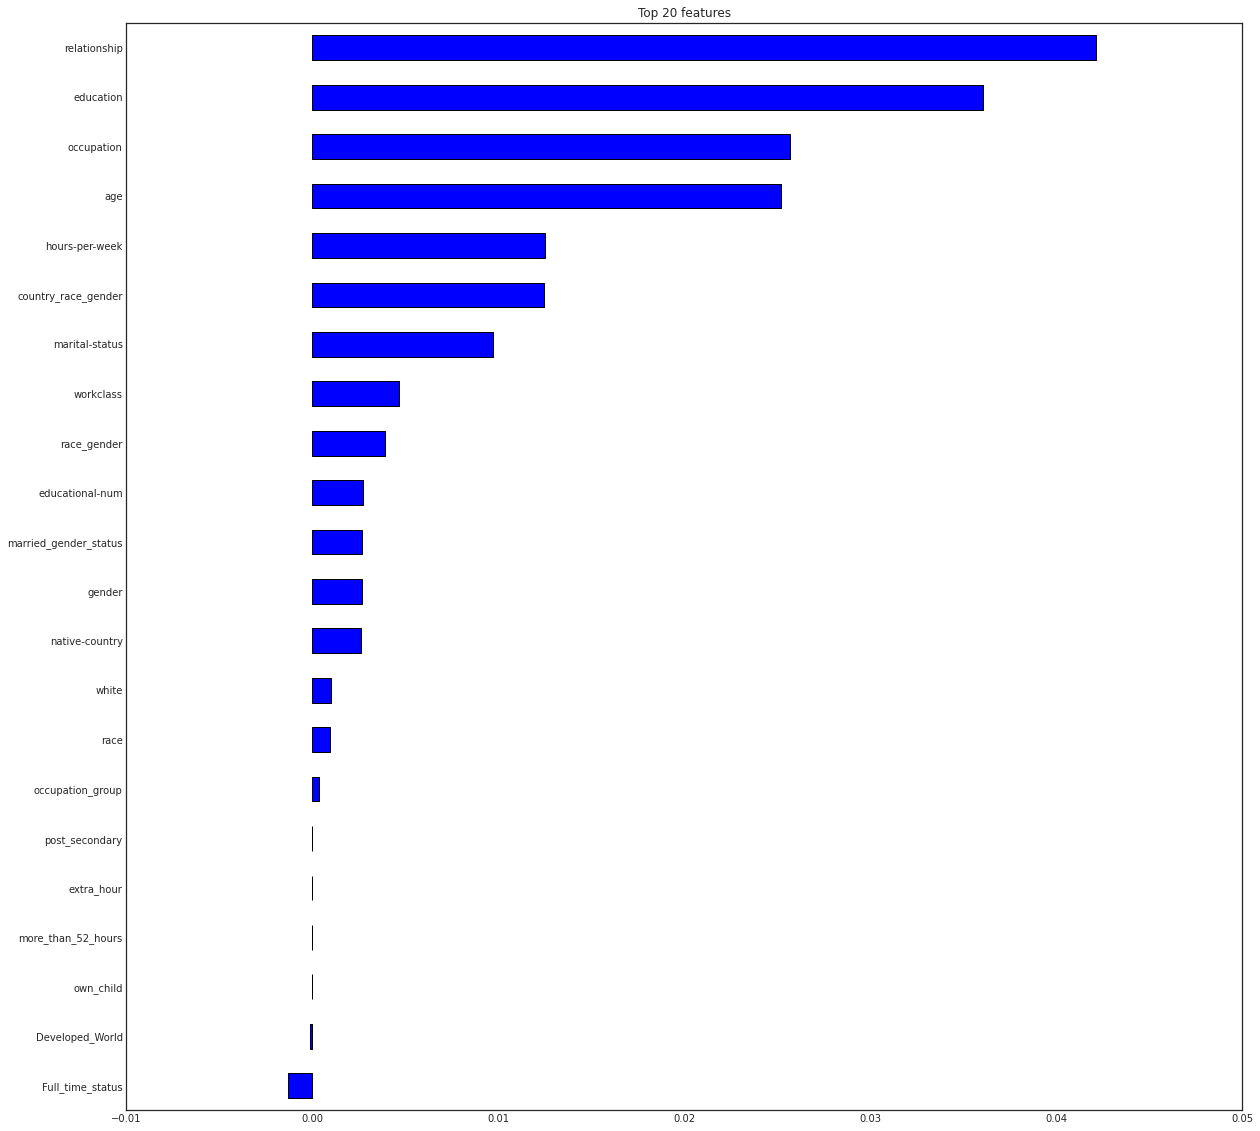

In [56]:
# 특성 중요도 그래프로 그리기
plt.style.use("seaborn-white")

fig.patch.set_facecolor('white')

n = 20
plt.figure(figsize=(n,n))
plt.title(f'Top {n} features')
plt.style.use('classic')
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True).plot.barh();

특성별 스코어마다, 오차가 있을 수 있다. ELI5를 통해 오차 정보까지 확인해보자.

In [57]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0421 ± 0.0044,relationship
0.0361 ± 0.0037,education
0.0257 ± 0.0059,occupation
0.0252 ± 0.0054,age
0.0125 ± 0.0065,hours-per-week
0.0125 ± 0.0052,country_race_gender
0.0097 ± 0.0025,marital-status
0.0046 ± 0.0035,workclass
0.0039 ± 0.0041,race_gender
0.0027 ± 0.0025,educational-num


특성 중요도를 높은 순위로 나열한 결과, 한 사람이 배우자가 있는지, 아이가 있는지 등을 종합적으로 나타내는 톡성인 `relationship`특성이 가장 중요한 것으로 나타났다. 흥미로운 것은 비슷한 내용을 나타내는 지표들인 `marital-status`특성의 중요도는 이보다 상당히 아래에 있다는 것이다. 또한 아이가 있는지를 나타내는 특성인 `own_child`는 중요도가 0으로 나온 것이 인상적이다. 아이가 있고 없고는, 소득이 늘어나는데 있어 중요하지 않다는 의미로 해석된다. 또한 교육수준, 나이, 직업 및 주당 근무시간 등이 개인이 고소득을 올리는데 영향을 끼친다는 것은 상식적으로 생각할 수 있다. 

상식적인 특성을 제외하고, 국가 및 인종과 성별을 나타내는 특성인 `country_race_gender`가 이 다음으로 중요하게 나타났다. 물론 국가에 따라 소득수준이 다를 수 있다는 것은 상식적일 수 있지만, 인종과 성별에 따라 소득 수준의 차이가 난다는 것은 아직까지도 전세계에 불평등이 많이 남아있다라는 것으로도 해석 될 수 있다.

위에서 얻은 특성 중요도를 바탕으로 특성을 선택하여 모델을 만든다. 먼저 특성을 고르기전 데이터의 사이즈를 체크한다.

In [58]:
# 특성 삭제전 데이터 확인
print('특성 삭제 전:', X_train.shape, X_val.shape)

특성 삭제 전: (32581, 22) (8146, 22)


위 특성들에 대한 중요도와 오차를 보니, 0.001을 기준으로 특성을 필터링하면, 중요도가 마이너스인 특성들은 골라낼 수 있을 것으로 보인다. 

In [59]:
# 중요도 0.001을 기준으로 특성 선택
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_val_selected = X_val[features]

In [60]:
# 특성 삭제 후 데이터 보기
print('특성 삭제 후:', X_train_selected.shape, X_val_selected.shape)

특성 삭제 후: (32581, 14) (8146, 14)


총 11개의 데이터가 선택된 것을 알 수 있다. 위의 ELI5의 결과에서 가장 중요한 `relationship` 특성에서 11번째 특성까지 고른 것이라고 볼 수 있다. 특성들이 각각 어느 정수로 인코딩 되어있는지를 알아야하기 때문에 Ordinal Encoder를 사용한다.

마지막으로 고른 특성들만 가진 데이터를 바탕으로 최종 모델을 만든다.

In [61]:
# 최종 모델 만들기
from category_encoders import OrdinalEncoder

pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder())),
    ('xgb', model) 
], verbose=1)

pipe.fit(X_train_selected, y_train);

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing xgb, total=  12.7s


최종 모델의 성능을 확인하자.

In [62]:
# 최종 모델의 성능 확인하기

y_pred = pipe.predict(X_val_selected)

print('검증 정확도: ', accuracy_score(y_val, y_pred))
print(classification_report(y_pred, y_val))

검증 정확도:  0.8057942548490057
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6216
           1       0.59      0.62      0.60      1930

    accuracy                           0.81      8146
   macro avg       0.73      0.74      0.74      8146
weighted avg       0.81      0.81      0.81      8146



이 전과 비교하여, 0과 1에 대한 F1성능의 차이가 줄어들었다. 과적합의 문제가 어느정도 더 해결된 것으로 파악된다. 최적의 파라미터와 최적의 특성들만을 사용하였으나, 전체적으로 1에 대해서는 지표들의 변화가 거의 없는 것으로 보아, 지금 상태의 모델은 충분히 최적에 가까운 모델로 판단된다. 해당 모델을 이용하여, 심층 분석에 들어갈 수 있을 것이라 판단된다.

####3-3-1. 선진국과 개발도상국의 결혼 여부에 따른 소득 격차

가장 먼저 선진국과 개발도상국 사이에서 결혼 여부에 따라 얼마나 격차가 날까? 이를 알아보기 위해서는 타깃 특성을 포함한 3가지의 변수를 사용해야 하는데, 일단 인코딩한 데이터가 필요하므로, 먼저 데이터를 인코딩한다. 이후에, 2D PDP(Partial Dependence Plot)를 이용하여 이 세가지 특성을 활용한 시각화를 통해 분석해 본다. 이를 위해서는 이전과는 다르게 인코더와 모델러를 분리할 필요가 있다. 또한, 우리가 원하는 특성들이 위 ELI5 특성 중요도에 따라 선택되지 않았으므로, 전체데이터에서 평가를 해야한다. 또한, 모델역시 전체 데이터로 다시 학습을 해야한다. 일단 전체 데이터가 다시 필요하므로, 데이터를 다시 정의한다.

In [63]:
# 타깃과 데이터 다시 정의하기

features = df.columns.drop([target])

X = df[features]
y = df[target]

X.shape, y.shape

((40727, 22), (40727,))

다음으로 P2P Plot을 그리기 위해서는, 각 특성의 범주를 유니크한 정수로 구분할 수 있는 Ordinal Encoder를 사용하여 모델링한다. 이후 P2P 시각화를 위해 인코더와 모델을 분리한다.

In [64]:
# 모델링 다시하기
from category_encoders import OrdinalEncoder

pipe = make_pipeline(
    OrdinalEncoder(), 
    model
)
pipe.fit(X, y);

In [65]:
# 인코더와 모델을 분리하기

encoder = pipe.named_steps['ordinalencoder']
X_encoded = encoder.fit_transform(X)
xgb = pipe.named_steps['xgbclassifier']

2D PDP를 분석하기 위해서는 인코더의 맵핑을 확인할 필요가 있다.

In [66]:
# encoder 맵핑을 확인합니다.
encoder.mapping

[{'col': 'workclass', 'data_type': dtype('O'), 'mapping': Private        1
  Public         2
  Not-Working    3
  NaN           -2
  dtype: int64},
 {'col': 'education', 'data_type': dtype('O'), 'mapping': Doctorate        1
  12th             2
  Bachelors        3
  7th-8th          4
  Some-college     5
  HS-grad          6
  9th              7
  10th             8
  11th             9
  Masters         10
  Preschool       11
  5th-6th         12
  Prof-school     13
  Assoc-voc       14
  Assoc-acdm      15
  1st-4th         16
  NaN             -2
  dtype: int64},
 {'col': 'marital-status',
  'data_type': dtype('O'),
  'mapping': Relationship lost    1
  Single               2
  Married              3
  NaN                 -2
  dtype: int64},
 {'col': 'occupation',
  'data_type': dtype('O'),
  'mapping': Exec-managerial       1
  Other-service         2
  Transport-moving      3
  Adm-clerical          4
  Machine-op-inspct     5
  Sales                 6
  Handlers-cleaners   

다음으로 PDP 카테고리값을 자동으로 맵핑해본다. 2D PDP를 그리기 위한 과정이다.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


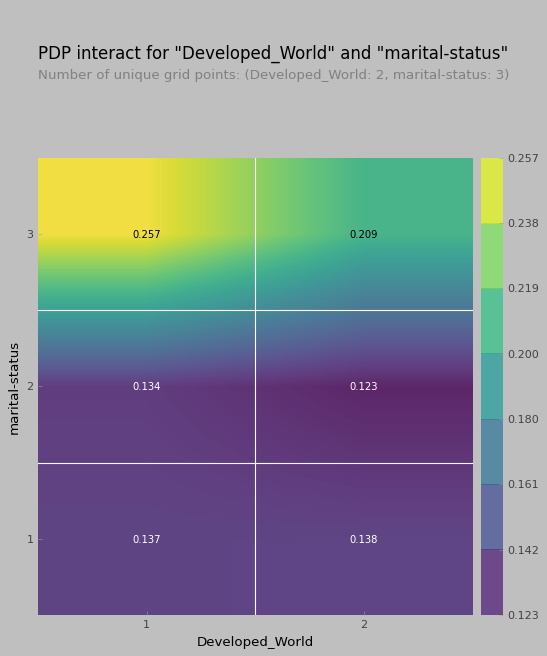

In [67]:
# 2D PDP
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Developed_World', 'marital-status']

interaction = pdp_interact(
    model=xgb, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)


pdp_interact_plot(interaction, plot_type='grid', feature_names=features, plot_params = {
    # plot title and subtitle
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    # color for contour line
    'contour_color':  'white',
    'font_family': 'Arial',
    # matplotlib color map for interact plot
    'cmap': 'viridis',
    # fill alpha for interact plot
    'inter_fill_alpha': 0.8,
    # fontsize for interact plot text
    'inter_fontsize': 9,
});



인코딩된 값들은 아래와 같다.

marital-status:
* Relationship lost -> 1
* Single -> 2
* Married -> 3

Developed_World:
* Yes -> 1
* No -> 2


선진국(Developed_World = 1)일수록 좀 더 고소득일 확률이 높아지는 것으로 나타났는데, 흥미로운것은, 결혼한(marital-status = 3)사람들이 고소득일 확률이 가장 높다는 것이다. Relationship Lost(marital-status = 1)는 이혼(divorced)한 이들과, 과부(widowed)가된 이들을 포함하는데, 결혼에 실패하거나 원하지 않은 이유로 배우자를 잃은 이들 역시 오히려 싱글보다 고소득일 확률이 약간 높았다. 선진국들에서는 이혼을 하게되면 양육비를 꾸준히 지급하는 법이 굉장히 강해서, 이혼을 할 경우, 아이를 책임지거나 상대 배우자에게 재산을 일부 양도해야 하는 상황에 놓일 수 있다. 또한, 과부가 된다고 하면, 맞벌이가 불가능하므로, 당연히 소득이 떨어질 수밖에 없는 위험이 있다. 그런데도 불구하고 어쨌든 결혼을 한번이라도 한 사람이 아예 안한 사람보다도 더 고소득자일 확률이 높다는 것은 상당히 의외의 결론이다. 
2D PDP Plot은 선진국과 개발도상국 사이에서 결혼 여부에 따른 고소득자의 비율이 어느정도 차이가 난다는 것을 보여주었다. 하지만, 고소득자로 갈수록 결국 고소득자로 판별되는데 있어, 선진국이냐 개발도상국이냐의 지표보다도, 결혼의 여부가 더 중요한 것으로 판단된다.

### 3-3-2. 인종별 결혼 여부에 대한 소득격차

다음으로 인종별 결혼 여부에 따른 소득격차를 한번 보자.



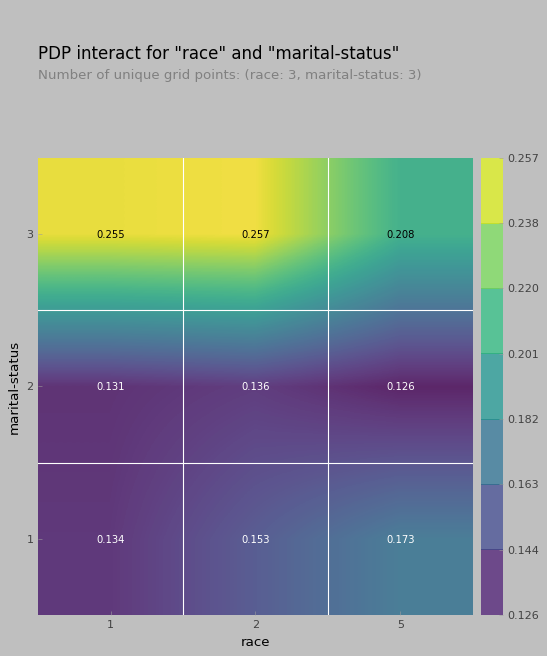

In [68]:
# 2D PDP
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['race', 'marital-status']

interaction = pdp_interact(
    model=xgb, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

특성들은 아래와 같이 인코딩되었다.

marital-status:
* Relationship lost -> 1
* Single -> 2
* Married -> 3

race:
* White                 1
* Black                 2
* Asian-Pac-Islander    3
* Other                 4
* Amer-Indian-Eskimo    5

백인(1)이 모든 인종에서 결혼 여부와 관계없이, 고소득을 올릴 확률이 가장 높다. 오히려 흑인들과 큰 차이가 없다는 것이 상당히 인상적인 결과다. 어쨌든 모든 인종에서 결혼을 할수록 고소득일 확률이 높아진다는 사실은, 이전 선진국과 개발도상국에서의 경우와 비슷했다. 나머지 인종들(3,4,5) 역시, 동양인을 포함하여 기혼자(Married)일수록 고소득을 올릴 확률이 높아졌지만, 백인과 흑인에 비교해서는 차이가 비교적 컸다.

이번에도 역시, 결혼을 한번 이라도 해본이들(Relationship lost)이 싱글(Single)들 보다 더 고소득일 확률이 높은 것으로 나타났다. 바로 이전 2D PDP에서 선진국 및 개발도상국의 결혼 여부에 따른 고소득자의 비율과 비슷한 결과가 나온 것이다. 어쩌면 개인이 태어난 곳이 선진국인지 아니면 백인인지에 대한 문제 보다도, 개인이 "결혼한 경험"이 있는지가 고소득자로 판별하는데 있어 더 중요한 정보라고 모델은 말하고 있는 것이 아닐까? 

### 3-3-3. 연령별 결혼 여부에 대한 소득격차

다음으로, 연령별 결혼 여부에 따른 소득격차를 보자. 

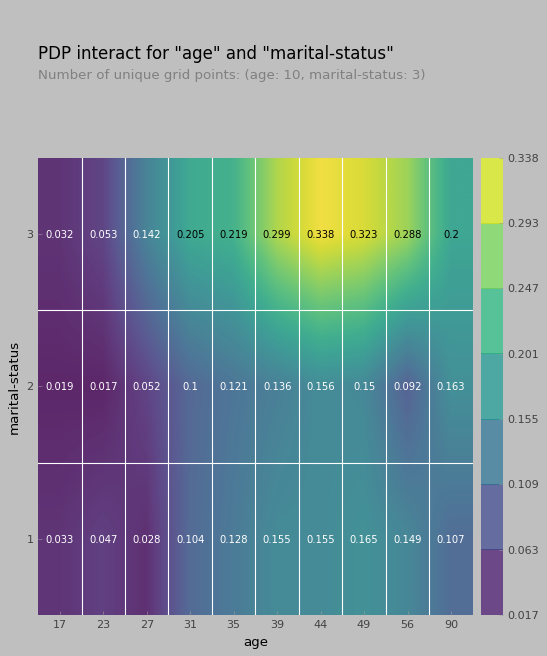

In [69]:
# 2D PDP
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['age', 'marital-status']

interaction = pdp_interact(
    model=xgb, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

특성들은 아래와 같이 인코딩되었다. 연령 정보는 숫자형 데이터이다.

marital-status:
* Relationship lost -> 1
* Single -> 2
* Married -> 3

연령별로는 이전의 인종이나 국가 여부보다도 좀 더 복잡한 결과가 나왔다. 일단 가장 고소득자의 비율이 높은 구간은 약 37세 부터 60세 이전 정도까지의 기혼자들이다. 아마 이때 쯤이면 회사에서 적어도 차부장급, 많으면 임원까지도 갈 수 있는 연령대이기 때문일 것이다. 대체적으로는, 연령대가 30대에서 60대 이전까지는 결혼 경험이 있을수록(Relationship Lost 포함) 더 고소득일 확률이 높아졌다. 흥미로운것은, 20대 중반 이후 부터 30대 이전까지, 60대 이후부터 90대까지는 오히려 Single이 Relationship lost보다 더 고소득일 확률이 높았다는 것이다. 하지만, 이 구간을 제외하고는 대부분의 경우 결혼을 한번이라도 했던 사람들이 더 고소득일 확률이 높았다. 전반적으로, Single과 Relationship lost의 차이보다도, 둘과 기혼자(Married)의 차이가 훨씬 더 컷다. 결혼을 한 이들이 고소득일 확률이 다른 두 경우보다, 모든 연령대에서 더 높다. 하지만, 30대 후반 부터 60대까지 고소득 기혼자들의 대부분이 왠지 사무직 남성들일 것만 같은 느낌이 드는 것은 왜일까?

####3-3-4. 결혼 여부에 대한 소득 격차 

다음으로, 모든 특성을 고려한 전반적인 결혼 여부에 대한 소득 격차를 한번 보자. 이번에는 특정 샘플에 대한 모든 특성들의 영향을 보여주는 SHAP라이브러리를 먼저 사용해본다. 먼저 SHAP을 사용하기 위해 JavaScript를 초기화하는 과정이 필요하다.

In [ ]:
# SHAP 사용을 위해 JavaScript 초기화하기
import shap

shap.initjs()

다음으로 SHAP을 사용하기 위한 데이터를 준비한다.

In [ ]:
# test ids를 저장하고 SHAP분석시 사용합니다

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=10000
    , stratify=y
    , random_state=2)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000
    , stratify=y_train_val
    , random_state=42)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (20727, 22)
y_train shape (20727,)
X_val shape (10000, 22)
y_val shape (10000,)
X_test shape (10000, 22)
y_test shape (10000,)


SHAP분석시 사용할 test id를 만든다.

In [ ]:
# test ids를 저장하고 SHAP분석시 사용합니다
test_id = X_test.index
test_id

Int64Index([37385, 33804, 40831,  6256,  3988, 38223, 34059, 37983, 25041,
            25161,
            ...
            25441, 28509,  3082, 31847, 28117, 19468, 29787, 27670, 20377,
            12169],
           dtype='int64', length=10000)

클래스 비울을 계산하기 위해, 다시 한번 클래스의 비율을 보자. 

In [ ]:
# 클래스의 비율
y_train.value_counts(normalize=True)

0    0.752207
1    0.247793
Name: income_>50K, dtype: float64

클래스의 비율은 최다에서 최소를 나눈다.

In [ ]:
# 비율 계산
ratio = 0.25/0.75
ratio

0.3333333333333333

다음으로, Gradient Boost를 이용하여 학습시킨다. 클래스 비율을 맞추기 위해 scale_pos_weight= #Charged Off / # Fully Paid를 설정한다.

In [ ]:
# 모델을 만든다.
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    OrdinalEncoder(), 
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

# XGBoost 분류기를 학습시킨다. 
model = XGBClassifier(n_estimators=1000, verbosity=0, n_jobs=-1, scale_pos_weight=ratio)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.845461	validation_1-auc:0.842494
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.850902	validation_1-auc:0.848457
[2]	validation_0-auc:0.852034	validation_1-auc:0.849067
[3]	validation_0-auc:0.857072	validation_1-auc:0.856349
[4]	validation_0-auc:0.857707	validation_1-auc:0.856596
[5]	validation_0-auc:0.860485	validation_1-auc:0.859687
[6]	validation_0-auc:0.864346	validation_1-auc:0.863022
[7]	validation_0-auc:0.86732	validation_1-auc:0.865806
[8]	validation_0-auc:0.867511	validation_1-auc:0.866144
[9]	validation_0-auc:0.868655	validation_1-auc:0.867133
[10]	validation_0-auc:0.870258	validation_1-auc:0.868876
[11]	validation_0-auc:0.870708	validation_1-auc:0.869889
[12]	validation_0-auc:0.871167	validation_1-auc:0.869897
[13]	validation_0-auc:0.871857	validation_1-auc:0.870815
[14]	validation_0-auc:0.871711	validation_1-auc:0.870656

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.3333333333333333,
              seed=None, silent=None, subsample=1, verbosity=0)

만들어진 모델에 대한 AUC와 Confusion Matrix를 확인한다.

In [ ]:
# AUC 찾기
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
X_val_processed = processor.transform(X_val)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test AUC for class "{model.classes_[class_index]}":')
print(roc_auc_score(y_test, y_pred_proba)) # 범위는 0-1, 수치는 높을 수록 좋습니다

Test AUC for class "1":
0.8871710778327077


In [ ]:
# Confusion matrix를 확인해 봅시다
from sklearn.metrics import classification_report
y_test_pred = model.predict(X_test_processed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      7522
           1       0.82      0.28      0.42      2478

    accuracy                           0.81     10000
   macro avg       0.81      0.63      0.65     10000
weighted avg       0.81      0.81      0.77     10000



1에 대한 정밀도는 오히려 0보다 좋아졌으나, 재현율이 크게 낮아져 F1이 전체적으로 낮아진 것을 볼 수 있다. 하지만 정확도는 81%정도로 높다.

예측값과 실제값을 비교해보자.

In [ ]:
# 에측값과 실제값 비교
df_p = pd.DataFrame({
    'id': test_id, 
    'pred_proba': y_pred_proba, # 예측확률 
    'status_group': y_test # 실제값
})

5만달러이상(1)의 소득을 올릴 확률과, 5만달러이하(0)의 소득을 올릴 가능성을 분리하자. 

In [ ]:
# 두 개의 클래스에 대한 확률 분리
no_5K = df_p['status_group'] == 0
yes_5K = ~no_5K
right = (no_5K) == (df_p['pred_proba'] > 0.50)
wrong = ~right

이제 SHAP 시각화를 보기 위한 함수를 한번 만들어보자. 시각화만 하면, 직관적인 설명이 부족하니, 시각화에 대한 설명을 추가한 함수를 만들어 보았다. 

In [ ]:
# SHAP 시각화를 함수화하여 사용한다

row = X_test.iloc[[0]]
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

def explain(row_number):
    positive_class = 1
    positive_class_index = 1

    # row 값을 변환합니다
    row = X_test.iloc[[row_number]]
    row_processed = processor.transform(row)

    # 예측하고 예측확률을 얻습니다 
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba

    # 예측결과와 확률값을 얻습니다
    print(f'이 소득에 대한 예측결과는 {pred} 으로, 확률은 {pred_proba:.0f}% 입니다.')
    
    # SHAP를 추가합니다
    shap_values = explainer.shap_values(row_processed)

    # Fully Paid에 대한 top 3 pros, cons를 얻습니다
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

    # 예측에 가장 영향을 준 top3
    print('\n')
    print('Positive에 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # 예측에 가장 반대적인 영향을 준 요인 top1
    print('\n')
    print('Negative에 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = cons if pred == positive_class else pros
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # SHAP
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit'
    )

위 함수를 이용하여, 엔트리 1에 대한 결과를 예측하여 SHAP 시각화를 해보자.

In [ ]:
explain(1)

이 소득에 대한 예측결과는 0 으로, 확률은 100% 입니다.


Positive에 영향을 가장 많이 주는 3가지 요인 입니다:
1. marital-status : Single
2. hours-per-week : 20
3. age : 26


Negative에 영향을 가장 많이 주는 3가지 요인 입니다:
1. Developed_World : Yes
2. own_child : No
3. country_race_gender : United-States White Female


위 데이터는 저소득자(5만달러이하)로 예측된 샘플이다. 나의 모델은 이 사람이 저소득일 것이라고 100% 확신하였다. 보다시피, 이 사람이 저소득으로 예측이 된 데에는 결혼 여부를 나타내는 marital-status라는 특성이 Single인 것이 가장크게 작용했고, 다음으로 주당 근무 시간과 나이가 가장 큰 요인으로 나타났다. 주당 근무시간이 20시간 밖에 되지 않는 Part-time job을 가지고 있고, 26살의 아직 어린나이라는 것은 저소득자로 예측하는데 있어 상식적인 요인으로 보인다. 하지만, 결혼을 하지 않은 싱글이라는 사실이 저소득으로 예측하는데 가장 컸다는 사실은 매우 흥미롭다. 일반적으로 생각했을때, 결혼을 하지 않는다면 가정유지와 아이를 교욱하는데 들어가는 돈에 대해 신경쓰지 않아도 된다는 것이 나의 생각이었기 때문이다. 상당히 안타까운 사실은, 이 여성이 "싱글인 여성(married_gender_status = Single Female)"이었다는 사실이 저소득으로 예측되는 요인이었다는 것이다. 나의 모델이 성차별을 하고 있다고 생각했지만, 사실 사회적으로 생각해 보았을 때, 여성이 남성만큼의 비율로 고소득인 국가는 아직 전세계에 없지 않을까 생각한다. 이러한 데이터를 학습했으니, 어쩌면 나의 모델이 이렇게 판단을 하는 것도 당연할 수 있다는 생각이 들었다.  

In [ ]:
df_p[yes_5K & right].sample(n=10, random_state=1).sort_values(by='pred_proba')

,id,pred_proba,status_group
26332,26332,0.077380,1
22152,22152,0.115184,1
2269,2269,0.119833,1
16683,16683,0.153603,1
38494,38494,0.217521,1
6731,6731,0.232406,1
15891,15891,0.260698,1
43893,43893,0.265335,1
34785,34785,0.329183,1
41352,41352,0.467510,1


In [ ]:
explain(150)

이 소득에 대한 예측결과는 1 으로, 확률은 50% 입니다.


Positive에 영향을 가장 많이 주는 3가지 요인 입니다:
1. marital-status : Married
2. educational-num : 13
3. occupation_group : White-collar job


Negative에 영향을 가장 많이 주는 3가지 요인 입니다:
1. occupation : Prof-specialty
2. Full_time_status : Full-time
3. education : Bachelors


다음은 고소득자로 예측된 샘플링 데이터다. 이전과는 다르게, 이 샘플에 대해서는 50%의 확률로 모델이 반신반의하는 예측을 했다. 우선, 이전 데이터와는 다르게, 이 사람은 결혼을 했다는 사실이 고소득자로 판별하는데 있어 가장큰 요인이었다는 것을 알 수 있다. 또한 13년 동안 교육을 받았다는 것은 대학 4년제를 나온 학사(Bachelor)라는 의미인데, 13년이라는 기간이 긍정적인 요소로 작용한데 반해, 학사 학위를 받은 것은 부정적 요인으로 예측했다는 것이 흥미롭다. 또한 이 사람에게는 사무직(White-collar job)을 가졌다는 것이 고소득으로 예측되는데 있어 긍정적으로 작용했다. 나이가 40살이며, 주당 60시간이 넘게 일을하는 사람이라는 것으로 미루어보아, 아마도 기업의 차/부장급이나 임원에 가까운 분이 아닐까하는 생각이든다. 

무엇보다도, 가장 작은 요인이기는 했지만 이 사람이 남편(relationship = Husband)라는 사실이 고소득자로 판명되는데 긍정적으로 작용했다는 사실이 인상적이다. 이전의 샘플은 "싱글인 여성" 이었던데 반해, 이번에는 "결혼한 남성" 이었기 때문에 오히려 긍정적으로 작용했다는 것이다. 이전 연령별 고소득자의 자료를 통해 짐작했던 바와 같이, 가장 고소득 비율이 높은 연령대인 30대 후반에서 60대의 기혼자들은, 대부분 이러한 유형의 사람일 것이라는 추측이 타당하다는 것을 보여준다.

과연 싱글인 여성이 결혼을 하지 않아서 이러한 차이가 발생한 것일까? 이를 확인해보기 위해 이번에는 PDP그래프를 그려보기로 했다. 결혼한 남성과 여성의 차이를 보기위해, relationship특성을 기준으로 보는 것이 좋겠다고 판단했다.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


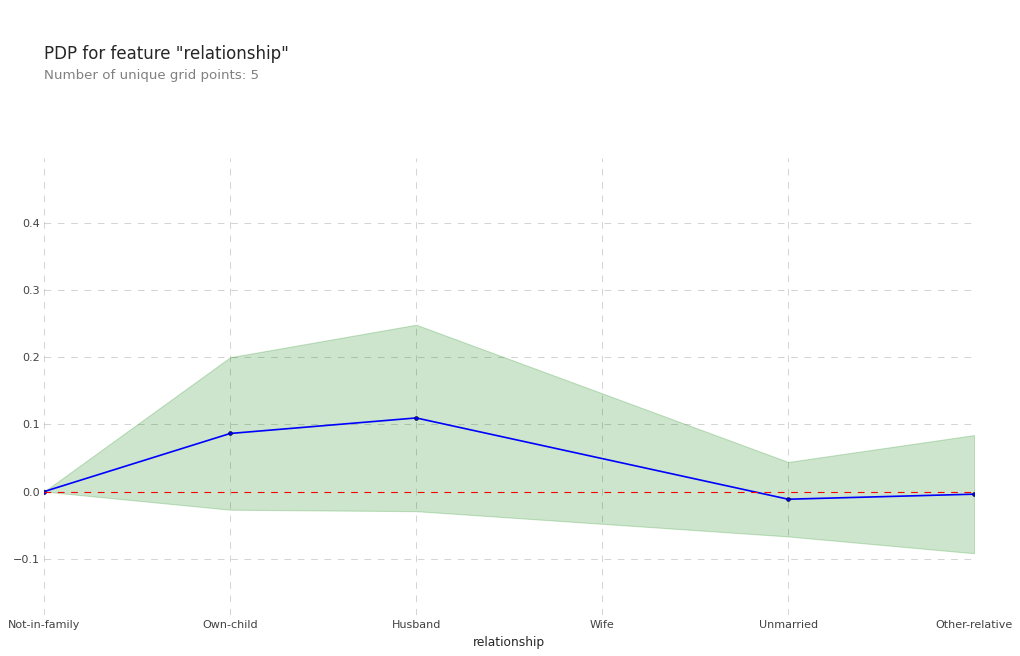

In [ ]:
# PDP 카테고리값 맵핑

from pdpbox.pdp import pdp_plot, pdp_isolate

feature = 'relationship'
features = df.columns.drop([target])

for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping'] # Series
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

fig = plt.style.use("seaborn-white")

# PDP그리기
pdp_dist = pdp_isolate(model=xgb, dataset=X_encoded, model_features=features, feature=feature)
pdp_plot(pdp_dist, feature, plot_params=
         {
    # plot title and subtitle
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    # matplotlib color map for ICE lines
    'line_cmap': 'Blues',
    'xticks_rotation': 0,
    # pdp line color, highlight color and line width
    'pdp_color': 'b',
    'pdp_hl_color': '#FEDC00',
    'pdp_linewidth': 1.5,
    # horizon zero line color and with
    'zero_color': 'r',
    'zero_linewidth': 1,
    # pdp std fill color and alpha
    'fill_color': 'g',
    'fill_alpha': 0.2,
    # marker size for pdp line
    'markersize': 3.5,
}
         )

# xticks labels 설정을 위한 리스트를 직접 넣지 않아도 됩니다 
plt.xticks(category_codes, category_names);

기준모델과 비교하였을 때, 가족이 없이 혼자 사는 이들(Not-in-family)이 고소득(5만달러 이상)을 올릴 확률은 매우 낮다. 아이가 생길수록(Own-child) 고소득을 벌어들일 수 있는 확률이 높아지지만, 남편(Husband)이 될수록 고소득이 될 확률이 가장 크게 늘어난다. 하지만 이 확률이 아내(Wife)가 되는 이들일수록 가파르게 줄어드는 것으로 보아, 아내가 되는 것은 오히려 고소득이 될 확률을 떨어뜨린다는 의미가 된다. 아이를 가진이들의 소득이 혼자사는 이들과 비교해서는 크게 늘어나지만, 남편이 되는 것과 아이를 가지는 것보다도 아내가 되는 것이 고소득을 올릴 확률을 줄인다는 것이다. 전세계적으로도, 아이를 가진 여성이 직업전선에서 많이 물러나거나 커리어를 희생한다는 뜻으로 여겨져 마음이 아프다. 전세계적으로 아직도 여전히 성별간 소득격차가 존재한다는 의미로 해석되어진다. 

또한 한번도 결혼하지 않은 싱글(Unmarried) 일수록 저소득일 확률이 그 어느 때보다도 더 늘어난다는 사실도 눈여겨볼 필요가있다. 일부 선진국에서는 특정 나이까지 싱글로 남아있는 이들에 대해 싱글세를 매긴다고 한다. 또한, 우리나라에서도 싱글인 이들중 많은 이들이 경제적인 문제 때문에 결혼을 미루는 이들도 많은 것으로보아, 이 데이터에서는 싱글일수록 경제 사정이 좋지 못한 이들이 많을 것으로 보인다. 결혼하고나서 해결되는 외로움 등의 문제나 심리적인 안정, 또는 아이에 대한 책임감 덕분에, 더 열심히 일하게 되는 사람들도 많다고 한다. 아이러니하게도, 아내가 될수록 고소득을 올릴 수 있는 확률이 낮아지지만, 그렇다고 결혼하지 않는 것은 오히려 더 소득을 낮추는 요인이 된다는 것이다. 마지막으로, 친척이나 사촌과 같이 사는 이들(Other-relative)의 경우에는 싱글인 이들보다 고소득을 올릴 확률은 좀 더 높아지지만, 여전히 고소득자가 될 가능성은 매우 낮은 것으로 보인다. 결국, 전세계 어디에서도 결혼을 하는 것이, 특히 남성에게는 고소득을 올릴 확률을 높여준다는 것으로 보인다.


## 4. 결론

선진국에서 생활할수록 고소득자가 될 확률이 높고, 그 중에서 백인들의 비중이 가장 높다는 것은 일반적으로 사람들이 생각할 수 있는 면과 일치했다. 또한, 전반적으로 선진국과 개발도상국 모두에서 남성, 특히 결혼한 남성이 5만달러 이상을 벌어들일 고소득자일 확률이 가장 높았다. 모든 인종에서 백인들이 고소득자인 비율이 가장 높고, 남성일수록 고소득자가 될 확률이 높은 것으로보아, 백인 남성이 가장 고소득자가 많은 것으로 보인다.  

가장 흥미로웠던 부분은, 이전 2D PDP나 SHAP에서 본 것 처럼, 국가나 인종의 특성보다도 기혼자라는 사실이 고소득자가 되는데 있어 가장 중요하다는 것이다. 그렇다는 것은, 이 정보가 개인의 국가나 인종에 대한 정보보다도, 그를 고소득자로 판별함에 있어 더 영향력이 크다라는 것을 의미한다. 즉, 결혼을 했다는 것이, 백인이냐 혹은 선진국 출신이냐 등의 지표보다도 더 개인이 고소득자인지를 판단하는데 있어 중요하다는 것이다.

결혼을 하게되면 더 비용이 많이 든다고 생각하는것이 일반적인데, 모델이 이를 부정하는 것이 흥미로웠다. 바로 이전의 PDP 시각화자료에서 보았던 것처럼, 아이가 생기는 것이 고소득이될 확률을 상당히 높이기는 하지만, 남편이 되는 것 만큼 높이지는 못했다. 아무래도, 결혼을 하게 되면 남성의 경제적인 책임감이 늘어나게 되면서, 좀 더 자신의 일에서 좋은 성과를 내는데 집중을 하게되는 요인도 있을 것이다.

하지만, 반대로 아내가 될수록 고소득자가 될 확률이 떨어진다는 것은, 남편의 고소득이 어느 정도 아내의 희생으로 이루어진다는 의미로 해석된다. 출산휴가가 있지만, 제대로 사용을 할 수 없는 환경에 놓인 이들이 많고, 아이에게 집중하기 위해 일을 그만두는 여성들도 많기 때문이다. 아무래도 우리나라를 포함한 일부 선진국과 대부분의 개발도상국에서는 이러한 현상이 일어나는 것으로 파악된다. 영화 <툴리>를 보면 세 명 이상의 아이들을 키우는 미국인 여성의 모습이 보이는데, 남편은 육아에 기여를 거의 하지 않는 모습을 볼 수 있다. 결국, 다수의 선진국들을 포함한 전세계 거의 대부분의 국가들에서 남편이 밖에서 경제 활동을 하고, 여성은 육아에 전념하는 관습이 계속해서 이어져오고 있다는 것이다. 

이러한 성별 소득격차의 가장 큰 문제는 사회적으로도 경제적으로도, 낭비라는 것이다. 여성들 중에도 인재가 많을텐데, 이들이 육아의 문제 때문에 산업 전선에서 물러나게 된다면, 그만큼 사회는 더 발전할 수 있는 중요한 동력을 잃게된다. 단지 1년 육아휴직을 갖는다고 해서, 수십년 교육받고 쌓아온 실력이 하루 아침에 없어지는 것은 아닐텐데, 육아휴직을 죄악시하는 문화는 결국 모두 스스로의 목을 졸이는 것이 아닐까? 국경을 넘어 범세계적으로 경쟁해야하는 현대 사회의 특성상, 능력있는 사람들을 더 많이 거느린 집단이 더 유리할 수 밖에 없다. 이들의 능력을 사회가 최대한 활용하는 것이 남성과 여성을 포함한 사회 구성원 모두에게 있어 자아실현과 경제발전을 동시에 이룰 수 있는 유일한 길이 아닐까?

남성들 입장에서도, 여성이 경제권을 위협받게 된다면, 장기적으로 보았을 때 그리 긍정적인 것이 아니다. 스스로 남성만큼 돈을 벌 수 없다는 현실에 부딪히게 되면, 결혼하는데 있어, 남성의 경제적 능력을 좀 더 보게 될 수밖에 없다. 남녀가 같이 고생해서 삶을 일구는 것이 아니라, 남성에게 의존할 수 밖에 없는 현실에서는 일부 경쟁에서 이긴자들만이 과도한 선택권을 갖게된다. 경쟁에서 이기지 못한 남성들이나, 고소득자가 아닌 남성들은 더욱 더 여성들에게 외면당할 수 밖에 없을 것이다. 당연히, 혼인율이 떨어질 수 밖에 없다. 지금 이러한 문제 때문에, 많은 여성들이 결혼을 하지 않으려는 생각을 가지고 있다. 남성의 경우 외국인 여성을 브로커를 통해 들여와 결혼하기도 하지만, 자녀에 대한 무관심과 혼혈인 차별, 외국인 아내에 대한 폭행 및 아내의 도주 등 해결이 쉽지 않은 여러 사회 문제들이 발생하고 있다.

그러니, 남성의 고소득의 원인이 아내의 희생을 바탕으로 이루어진다는 것이 과연 올바른 것일까? 결혼을 한 이후에 남성이 가장으로써 가지게 되는 책임감을 느낀다는 것은 매우 중요한 것이지만, 아내가 자신의 경력을 희생할 수 밖에 없는 현실이라는 것에는 안타까움이 든다. 이혼율이 크게 늘어나는 현재 사회에서, 이혼을 하거나 과부가 생길 경우, 육아에 전념하느라 경력이 단절된 여성들에게는 아이를 카우기 위한 여건이 상당히 안 좋아지기 때문이다. 청년 여성들이 이런 통계를 보면, 오히려 결혼을 더 기피하게 되지 않을까? 여성을 남성에게 의존할 수 밖에 없게 만드는 사회가 과연 건강한 것일까? 이 프로젝트를 통해 더 큰 질문을 안게 되었다. 